# Test the folium application
Make foliumm maps that include the EOdal generated S2 images

In [36]:
# load packages
import folium
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob

### list available files

In [37]:
# User inputs
aoi_name = "WITZ"
satellite_tiffs_dir = Path(f"./{aoi_name}")


path_str = str(satellite_tiffs_dir.absolute())

# all_files = get_files(satellite_tiffs_dir, "tiff")

# can be made nicer...
filelist = glob(str(path_str + "/" + "*tiff"))

[x.split(".")[0].split("/")[-1].split("_")[0] for x in filelist]

['2023-08-22',
 '2023-06-23',
 '2023-06-03',
 '2023-06-13',
 '2023-06-28',
 '2023-07-08',
 '2023-09-06',
 '2023-06-08',
 '2023-09-11']

In [38]:
# select date you want to plot 
# TODO: make this available from the map
selected_date = "2023-09-11"

In [39]:

fname = f"{selected_date}_{aoi_name}_WGS84.tiff"
path_infile_tiff = satellite_tiffs_dir.joinpath(fname)

# read in the created TIFF to allow geolocalization
with rio.open(path_infile_tiff) as src:
    boundary = src.bounds
    img = src.read()
    nodata = src.nodata    

img[img<0.0] = np.nan

# calculate the center of the supplied TIFF
calc_lat = (boundary.bottom + boundary.top)/2
calc_lon = (boundary.left + boundary.right)/2

# calculate the boundaries used by ImageOverlay (SW, NE)
img_bounds = ((boundary.bottom, boundary.left), (boundary.top, boundary.right))

In [40]:
# the image is in (BANDS, Y, X) format
# Folium expects (Y, X, BANDS) format
img_rearranged = np.moveaxis(img, 0, -1)

# img_rearranged.shape

(441, 720, 3)

In [41]:
# check the plotting of matplotlib used internally by folium...

img_for_plot = img_rearranged
# this doesn't do anything... I hoped to remove the NANs being plotted as black in the map...

img_for_plot[img_for_plot<=0] = np.nan
# img_for_plot[img_for_plot>=254] = np.nan

# make fit for plotting
img_for_plot = (img_for_plot*255).astype(np.uint8)

# mask NA values
# plt.imshow(img_for_plot)

# TODO: mask NA values in the plot

/tmp/ipykernel_1024796/404344792.py:10: RuntimeWarning: invalid value encountered in cast
  img_for_plot = (img_for_plot*255).astype(np.uint8)



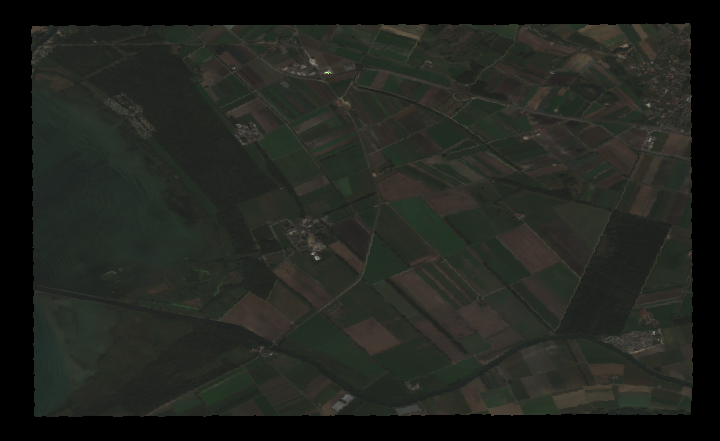

In [42]:
center = (calc_lat, calc_lon)

m = folium.Map(location=center, zoom_start=12)

folium.raster_layers.ImageOverlay(
    image=img_for_plot,
    name=fname,
    bounds=img_bounds
).add_to(m)

# folium.LayerControl().add_to(m)

m